In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib import rc

df_2016 = pd.read_csv('opportunity_youth_2016.csv')
df_2017 = pd.read_csv('opportunity_youth_2017.csv')

In [33]:
# nested proportional area chart function
def nested_circles(data, labels=None, c=None, ax=None, 
                   cmap=None, norm=None, textkw={}):
    ax = ax or plt.gca()
    data = np.array(data)
    R = np.sqrt(data/data.max())
    p = [plt.Circle((0,r), radius=r) for r in R[::-1]]
    arr = data[::-1] if c is None else np.array(c[::-1])
    col = PatchCollection(p, cmap=cmap, norm=norm, array=arr)

    ax.add_collection(col)
    ax.axis("off")
    ax.set_aspect("equal")
    ax.autoscale()

    if labels is not None:
        kw = dict(color="white", va="center", ha="center")
        kw.update(textkw)
        ax.text(0, R[0], labels[0], **kw)
        for i in range(1, len(R)):
            ax.text(0, R[i]+R[i-1], labels[i], **kw)
    return col

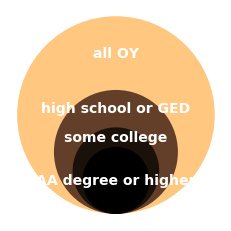

In [34]:
#run for 2016
data = [df_2016['Total'][4],df_2016['Total'][3],df_2016['Total'][2],df_2016['Total'][0]]
labels = ['AA degree or higher', 'some college', 'high school or GED', 'all OY']
nested_circles(data, labels=labels, cmap="copper", textkw=dict(fontsize=14))
plt.show()

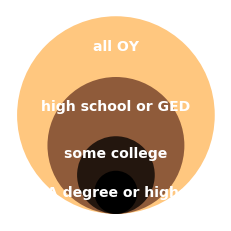

In [35]:
# run for 2017
data = [df_2017['Total'][4],df_2017['Total'][3],df_2017['Total'][2],df_2017['Total'][0]]
labels = ['AA degree or higher', 'some college', 'high school or GED', 'all OY']
nested_circles(data, labels=labels, cmap="copper", textkw=dict(fontsize=14))
plt.show()

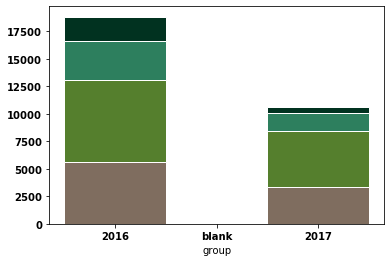

In [38]:
# stacked bar chart 
 
# y-axis in bold
rc('font', weight='bold')
 
# define groups
NoDiploma = [df_2016['Total'][1], 0, df_2017['Total'][1]]
HSDiplomaorGED = [df_2016['Total'][2], 0, df_2017['Total'][2]]
SomeCollegeNoDegree = [df_2016['Total'][3], 0, df_2017['Total'][3]]
AADegreeorHigher = [df_2016['Total'][4], 0, df_2017['Total'][4]]

# Values of each group
bars1 = NoDiploma
bars2 = HSDiplomaorGED
bars3 = SomeCollegeNoDegree
bars4 = AADegreeorHigher

# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
bars_2 = np.add(bars1, np.add(bars2, bars3)).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2]
 
# Names of group and bar width
names = ['2016', 'blank', '2017']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
# Create blue bars (top)
plt.bar(r, bars4, bottom=bars_2, color='#013220', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()
